2.

In [40]:
import librosa
import tensorflow as tf


# Load TinySOL metadata
# Import mirdata library
import mirdata

# Initialize tinysol dat

tinysol_dataset = mirdata.initialize("tinysol")
tinysol_dataset.download()
# Load tinysol metadata
tinysol_metadata = tinysol_dataset._metadata

INFO: Downloading ['audio', 'annotations'] to /tmp\mir_datasets\tinysol
INFO: [audio] downloading TinySOL.tar.gz
INFO: /tmp\mir_datasets\tinysol\audio\TinySOL.tar.gz already exists and will not be downloaded. Rerun with force_overwrite=True to delete this file and force the download.
INFO: [annotations] downloading TinySOL_metadata.csv
INFO: /tmp\mir_datasets\tinysol\annotation\TinySOL_metadata.csv already exists and will not be downloaded. Rerun with force_overwrite=True to delete this file and force the download.


In [76]:
y, sr = tinysol_dataset.track("BTb-ord-F#1-pp-N-N").audio

C:\Users\JIYAO\AppData\Local\Temp\ipykernel_6924\3173994840.py:6: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(librosa.stft(y), ref=np.max), sr=sr, x_axis='time', y_axis='log')


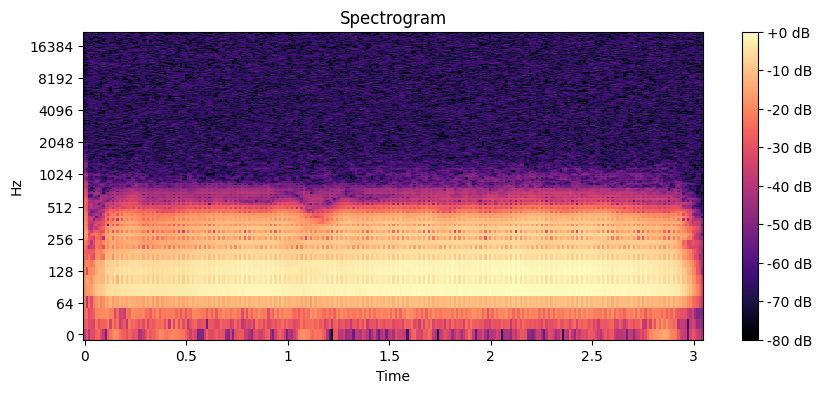

In [77]:
import numpy as np
import librosa.display
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(librosa.stft(y), ref=np.max), sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

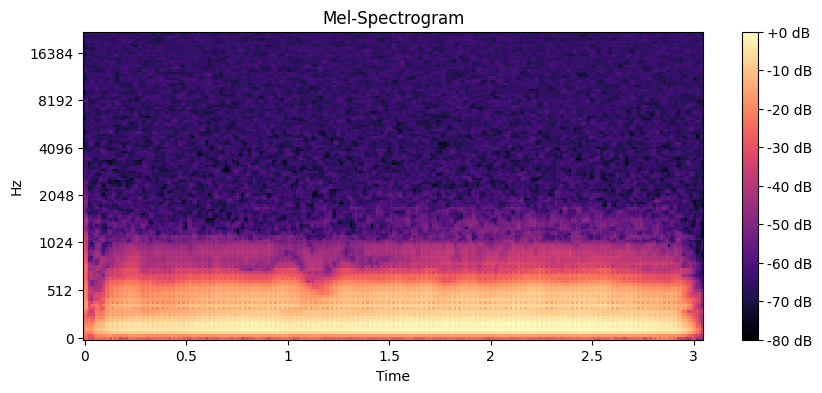

In [43]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram')
plt.show()

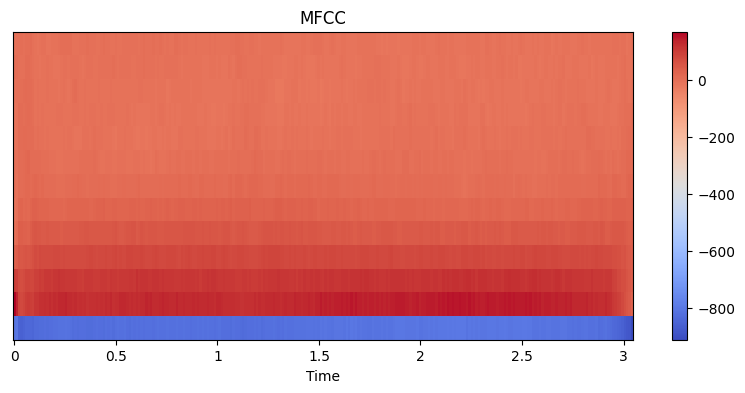

In [44]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.show()

3.

#Feature Extraction

In [45]:
import numpy as np
# Create empty lists to store MFCC features and labels
mfccs_list = []
instrument_list = []
pitch_list = []

i=0
# Iterate through all the tracks in the dataset
for track_id in tinysol_dataset.track_ids:
  i=i+1
  # Load a track by its ID
  track = tinysol_dataset.track(track_id)

  # Print some track information
  print("Track ID:", track.track_id)
  print("Instrument name:", track.instrument_full)
  print("Pitch class:", track.pitch)
  print("Music count:",i)
  #print("Dynamics:", track.dynamics)

  # Load and play the audio file of the track
  audio, sr = track.audio
  #track.play_audio()

  # TODO:  IMPLEMENT FEATURE EXTRACTION
  feat = np.mean(librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40).T, axis=0)

  # Append the MFCC features and labels to the lists
  mfccs_list.append(feat)
  instrument_list.append(track.instrument_full)
  pitch_list.append(track.pitch)
  

print("total:",i)






Track ID: BTb-ord-F#1-pp-N-N
Instrument name: Bass Tuba
Pitch class: F#1
Music count: 1
Track ID: BTb-ord-G1-pp-N-R100u
Instrument name: Bass Tuba
Pitch class: G1
Music count: 2
Track ID: BTb-ord-G#1-pp-N-T16u
Instrument name: Bass Tuba
Pitch class: G#1
Music count: 3
Track ID: BTb-ord-A1-pp-N-T23d
Instrument name: Bass Tuba
Pitch class: A1
Music count: 4
Track ID: BTb-ord-A#1-pp-N-N
Instrument name: Bass Tuba
Pitch class: A#1
Music count: 5
Track ID: BTb-ord-B1-pp-N-N
Instrument name: Bass Tuba
Pitch class: B1
Music count: 6
Track ID: BTb-ord-C2-pp-N-T13d
Instrument name: Bass Tuba
Pitch class: C2
Music count: 7
Track ID: BTb-ord-C#2-pp-N-N
Instrument name: Bass Tuba
Pitch class: C#2
Music count: 8
Track ID: BTb-ord-D2-pp-N-T18u
Instrument name: Bass Tuba
Pitch class: D2
Music count: 9
Track ID: BTb-ord-D#2-pp-N-T11u
Instrument name: Bass Tuba
Pitch class: D#2
Music count: 10
Track ID: BTb-ord-E2-pp-N-T25u
Instrument name: Bass Tuba
Pitch class: E2
Music count: 11
Track ID: BTb-ord-F2

In [46]:
# Convert the lists to numpy arrays for tensorflow compatibility[^2^][2] [^3^][3]
mfccs_array = np.array(mfccs_list)
instrument_array = np.array(instrument_list)
pitch_array = np.array(pitch_list)

#Encode labels

In [47]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
instrument_array = le.fit_transform(instrument_array)
instr_classes = le.classes_
print(instr_classes)
pitch_array = le.fit_transform(pitch_array)
pitch_classes = le.classes_
print(pitch_classes)

['Accordion' 'Alto Saxophone' 'Bass Tuba' 'Bassoon' 'Cello'
 'Clarinet in Bb' 'Contrabass' 'Flute' 'French Horn' 'Oboe' 'Trombone'
 'Trumpet in C' 'Viola' 'Violin']
['A#1' 'A#2' 'A#3' 'A#4' 'A#5' 'A#6' 'A#7' 'A1' 'A2' 'A3' 'A4' 'A5' 'A6'
 'A7' 'B1' 'B2' 'B3' 'B4' 'B5' 'B6' 'B7' 'C#2' 'C#3' 'C#4' 'C#5' 'C#6'
 'C#7' 'C#8' 'C2' 'C3' 'C4' 'C5' 'C6' 'C7' 'C8' 'D#2' 'D#3' 'D#4' 'D#5'
 'D#6' 'D#7' 'D2' 'D3' 'D4' 'D5' 'D6' 'D7' 'E1' 'E2' 'E3' 'E4' 'E5' 'E6'
 'E7' 'F#1' 'F#2' 'F#3' 'F#4' 'F#5' 'F#6' 'F#7' 'F1' 'F2' 'F3' 'F4' 'F5'
 'F6' 'F7' 'G#1' 'G#2' 'G#3' 'G#4' 'G#5' 'G#6' 'G#7' 'G1' 'G2' 'G3' 'G4'
 'G5' 'G6' 'G7']


#Split Training Set and Testing Set

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, ConfusionMatrixDisplay

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_instrument, y_test_instrument, y_train_pitch, y_test_pitch = train_test_split(
    mfccs_array, instrument_array, pitch_array,test_size=0.2, random_state=23) # DON'T Modify Random_state!


In [50]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues, figsize=(6, 6)):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')
    fig, ax = plt.subplots(figsize=figsize)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)
    fig.colorbar(im)
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks, classes, rotation=90)
    ax.set_yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    plt.show()

##Instrument Classification

In [51]:
# Import scikit-learn library for SVM model and K-fold cross-validation
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
print("SVM Training:")
# Create a model for Intstrument Classification
svm_model = SVC(kernel='linear', random_state=42)

# Perform K-fold cross-validation
kfold = KFold(n_splits=6)
for train_index, val_index in kfold.split(X_train):
  X_train_kfold, X_val_kfold = X_train[train_index], X_train[val_index]
  y_train_kfold_instrument, y_val_kfold_instrument = y_train_instrument[train_index], y_train_instrument[val_index]

  # TODO: Train your model using the train subset
  svm_model.fit(X_train_kfold, y_train_kfold_instrument)

  # TODO:　Evaluate your model  using the validation subset

  print(" Validation score:", svm_model.score(X_val_kfold,y_val_kfold_instrument))

# TODO: Evaluate your model using the test set

print("Test score:", svm_model.score(X_test,y_test_instrument))

SVM Training:
 Validation score: 0.9408740359897172
 Validation score: 0.9357326478149101
 Validation score: 0.9201030927835051
 Validation score: 0.9252577319587629
 Validation score: 0.9381443298969072
 Validation score: 0.9355670103092784
Test score: 0.9485420240137221


In [52]:
print("Decision tree Training:")
# Create a model for Intstrument Classification
dt_model = DecisionTreeClassifier(random_state=42)

# Perform K-fold cross-validation
kfold = KFold(n_splits=6)
for train_index, val_index in kfold.split(X_train):
  X_train_kfold, X_val_kfold = X_train[train_index], X_train[val_index]
  y_train_kfold_instrument, y_val_kfold_instrument = y_train_instrument[train_index], y_train_instrument[val_index]

  # TODO: Train your model using the train subset
  dt_model.fit(X_train_kfold, y_train_kfold_instrument)

  # TODO:　Evaluate your model  using the validation subset

  print(" Validation score:", dt_model.score(X_val_kfold,y_val_kfold_instrument))

# TODO: Evaluate your model using the test set

print("Test score:", dt_model.score(X_test,y_test_instrument))

Decision tree Training:
 Validation score: 0.794344473007712
 Validation score: 0.7455012853470437
 Validation score: 0.7835051546391752
 Validation score: 0.8247422680412371
 Validation score: 0.788659793814433
 Validation score: 0.7422680412371134
Test score: 0.8010291595197255


In [53]:
print("MLP Training:")
# Create a model for Intstrument Classification
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Perform K-fold cross-validation
kfold = KFold(n_splits=6)
for train_index, val_index in kfold.split(X_train):
  X_train_kfold, X_val_kfold = X_train[train_index], X_train[val_index]
  y_train_kfold_instrument, y_val_kfold_instrument = y_train_instrument[train_index], y_train_instrument[val_index]

  # TODO: Train your model using the train subset
  mlp_model.fit(X_train_kfold, y_train_kfold_instrument)

  # TODO:　Evaluate your model  using the validation subset

  print(" Validation score:", mlp_model.score(X_val_kfold,y_val_kfold_instrument))

# TODO: Evaluate your model using the test set

print("Test score:", mlp_model.score(X_test,y_test_instrument))

MLP Training:
 Validation score: 0.9254498714652957
 Validation score: 0.9511568123393316
 Validation score: 0.9201030927835051
 Validation score: 0.9484536082474226
 Validation score: 0.9458762886597938
 Validation score: 0.9458762886597938
Test score: 0.9536878216123499


Confusion matrix


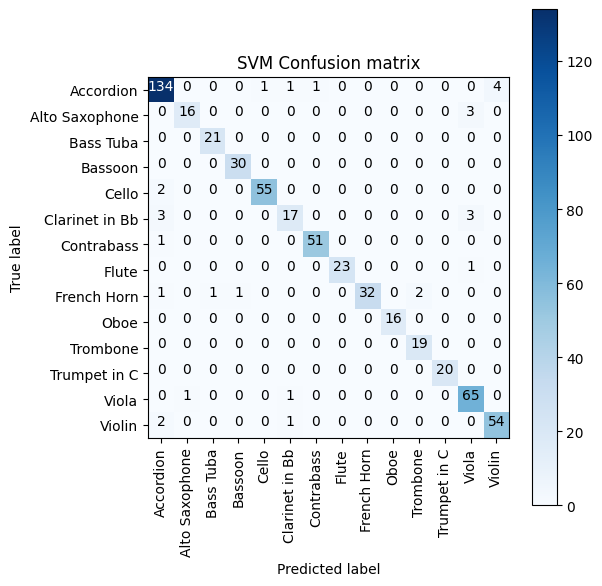

ACC =  0.949
precision =  0.949
recall =  0.949


In [54]:
y_pred_instr = svm_model.predict(X_test)
accuracy = accuracy_score(y_test_instrument, y_pred_instr)
recall = recall_score(y_test_instrument, y_pred_instr, average='micro') #can try other ave method
precision = precision_score(y_test_instrument, y_pred_instr, average='micro')
cm = confusion_matrix(y_test_instrument, y_pred_instr)
plot_confusion_matrix(cm , instr_classes, title="SVM Confusion matrix")
print('ACC = ',  round(accuracy,3))
print('precision = ', round(precision,3))
print('recall = ', round(recall, 3))

Confusion matrix


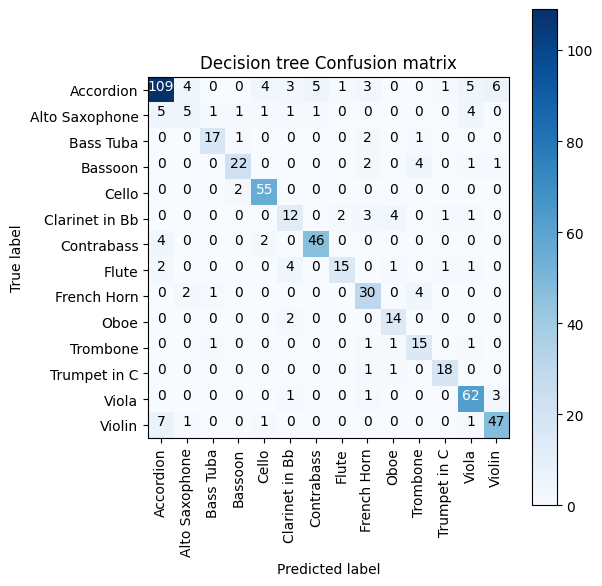

ACC =  0.801
precision =  0.801
recall =  0.801


In [55]:
y_pred_instr = dt_model.predict(X_test)
accuracy = accuracy_score(y_test_instrument, y_pred_instr)
recall = recall_score(y_test_instrument, y_pred_instr, average='micro') #can try other ave method
precision = precision_score(y_test_instrument, y_pred_instr, average='micro')
cm = confusion_matrix(y_test_instrument, y_pred_instr)
plot_confusion_matrix(cm , instr_classes, title="Decision tree Confusion matrix")
print('ACC = ',  round(accuracy,3))
print('precision = ', round(precision,3))
print('recall = ', round(recall, 3))

Confusion matrix


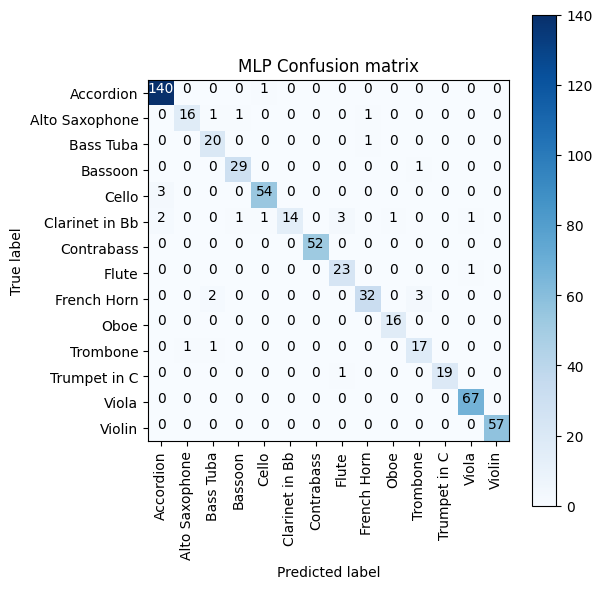

ACC =  0.954
precision =  0.954
recall =  0.954


In [56]:
y_pred_instr = mlp_model.predict(X_test)
accuracy = accuracy_score(y_test_instrument, y_pred_instr)
recall = recall_score(y_test_instrument, y_pred_instr, average='micro') #can try other ave method
precision = precision_score(y_test_instrument, y_pred_instr, average='micro')
cm = confusion_matrix(y_test_instrument, y_pred_instr)
plot_confusion_matrix(cm , instr_classes, title="MLP Confusion matrix")
print('ACC = ',  round(accuracy,3))
print('precision = ', round(precision,3))
print('recall = ', round(recall, 3))

4.

##Pitch Classification

In [57]:
print("SVM Training:")
# Create a model for Pitch Classification
svm_model_pitch = SVC(kernel='linear', random_state=42)
# Perform K-fold cross-validation
kfold = KFold(n_splits=6)
for train_index, val_index in kfold.split(X_train):
  # Get the train and validation subsets
  X_train_kfold, X_val_kfold = X_train[train_index], X_train[val_index]
  y_train_kfold_pitch, y_val_kfold_pitch = y_train_pitch[train_index], y_train_pitch[val_index]
  # TODO: Train your model using the train subset
  svm_model_pitch.fit(X_train_kfold, y_train_kfold_pitch)

  # TODO:　Evaluate your model  using the validation subset

  print(" Validation score:", svm_model_pitch.score(X_val_kfold,y_val_kfold_pitch))

# TODO: Evaluate your model using the test set

print("Test score:", svm_model_pitch.score(X_test,y_test_pitch))

SVM Training:
 Validation score: 0.8226221079691517
 Validation score: 0.8329048843187661
 Validation score: 0.8273195876288659
 Validation score: 0.845360824742268
 Validation score: 0.845360824742268
 Validation score: 0.8350515463917526
Test score: 0.8507718696397941


In [58]:
print("Decision tree Training:")
# Create a model for Pitch Classification
dt_model_pitch = DecisionTreeClassifier(random_state=42)
# Perform K-fold cross-validation
kfold = KFold(n_splits=6)
for train_index, val_index in kfold.split(X_train):
  # Get the train and validation subsets
  X_train_kfold, X_val_kfold = X_train[train_index], X_train[val_index]
  y_train_kfold_pitch, y_val_kfold_pitch = y_train_pitch[train_index], y_train_pitch[val_index]
  # TODO: Train your model using the train subset
  dt_model_pitch.fit(X_train_kfold, y_train_kfold_pitch)

  # TODO:　Evaluate your model  using the validation subset

  print(" Validation score:", dt_model_pitch.score(X_val_kfold,y_val_kfold_pitch))

# TODO: Evaluate your model using the test set

print("Test score:", dt_model_pitch.score(X_test,y_test_pitch))

Decision tree Training:
 Validation score: 0.6889460154241646
 Validation score: 0.7043701799485861
 Validation score: 0.6314432989690721
 Validation score: 0.7087628865979382
 Validation score: 0.6804123711340206
 Validation score: 0.6958762886597938
Test score: 0.7358490566037735


In [59]:
print("MLP Training:")
# Create a model for pitch Classification
mlp_model_pitch = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
# Perform K-fold cross-validation
kfold = KFold(n_splits=6)
for train_index, val_index in kfold.split(X_train):
  # Get the train and validation subsets
  X_train_kfold, X_val_kfold = X_train[train_index], X_train[val_index]
  y_train_kfold_pitch, y_val_kfold_pitch = y_train_pitch[train_index], y_train_pitch[val_index]
  # TODO: Train your model using the train subset
  mlp_model_pitch.fit(X_train_kfold, y_train_kfold_pitch)

  # TODO:　Evaluate your model  using the validation subset

  print(" Validation score:", mlp_model_pitch.score(X_val_kfold,y_val_kfold_pitch))

# TODO: Evaluate your model using the test set

print("Test score:", mlp_model_pitch.score(X_test,y_test_pitch))

MLP Training:
 Validation score: 0.794344473007712
 Validation score: 0.7866323907455013
 Validation score: 0.7989690721649485
 Validation score: 0.8195876288659794
 Validation score: 0.788659793814433
 Validation score: 0.7938144329896907
Test score: 0.8130360205831904


In [60]:
print("SVM evaluating:")
y_pred_pitch = svm_model_pitch.predict(X_test)

accuracy = accuracy_score(y_test_pitch, y_pred_pitch)
recall = recall_score(y_test_pitch, y_pred_pitch, average='micro') #can try other ave method
precision = precision_score(y_test_pitch, y_pred_pitch, average='micro')

print('ACC = ',  round(accuracy,3))
print('precision = ', precision)
print('recall = ', recall)

SVM evaluating:
ACC =  0.851
precision =  0.8507718696397941
recall =  0.8507718696397941


Confusion matrix


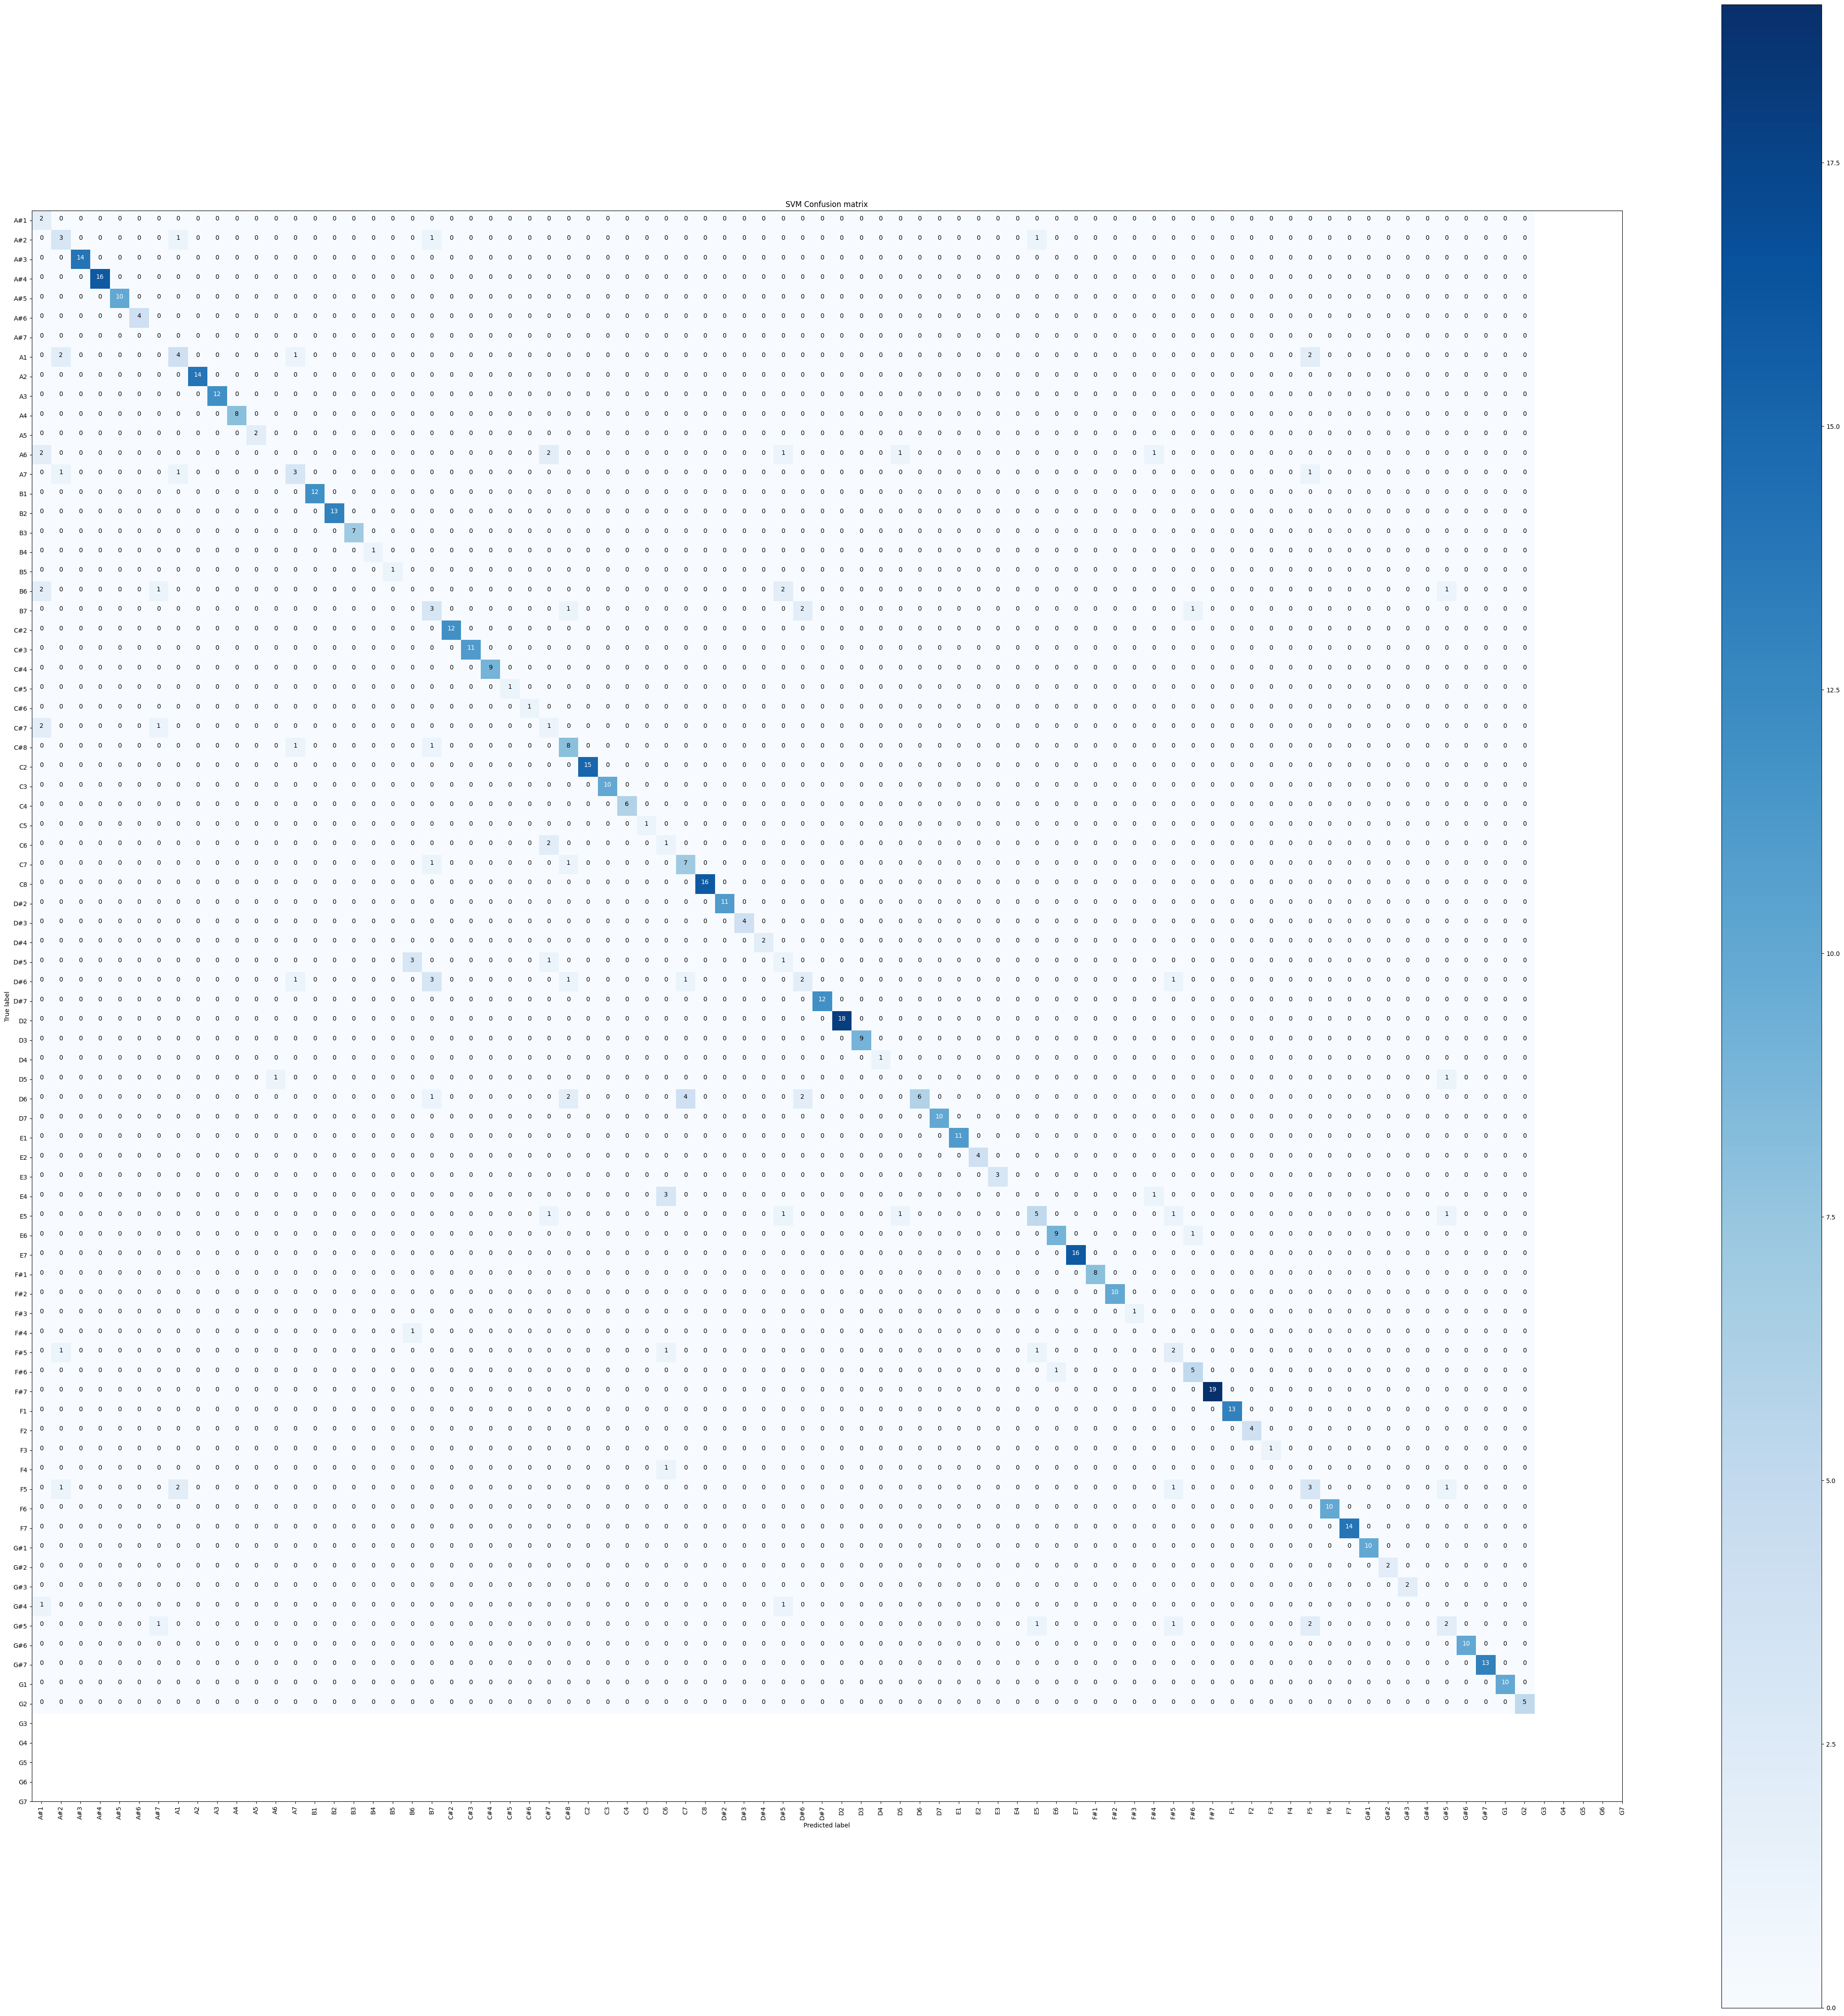

In [61]:
cm = confusion_matrix(y_test_pitch, y_pred_pitch)
plot_confusion_matrix(cm , pitch_classes, title="SVM Confusion matrix",figsize=(45,45))


In [62]:
print("SVM evaluating:")
y_pred_pitch = svm_model_pitch.predict(X_test)

accuracy = accuracy_score(y_test_pitch, y_pred_pitch)
recall = recall_score(y_test_pitch, y_pred_pitch, average='micro') #can try other ave method
precision = precision_score(y_test_pitch, y_pred_pitch, average='micro')

print('ACC = ',  round(accuracy,3))
print('precision = ', precision)
print('recall = ', recall)

SVM evaluating:
ACC =  0.851
precision =  0.8507718696397941
recall =  0.8507718696397941


Confusion matrix


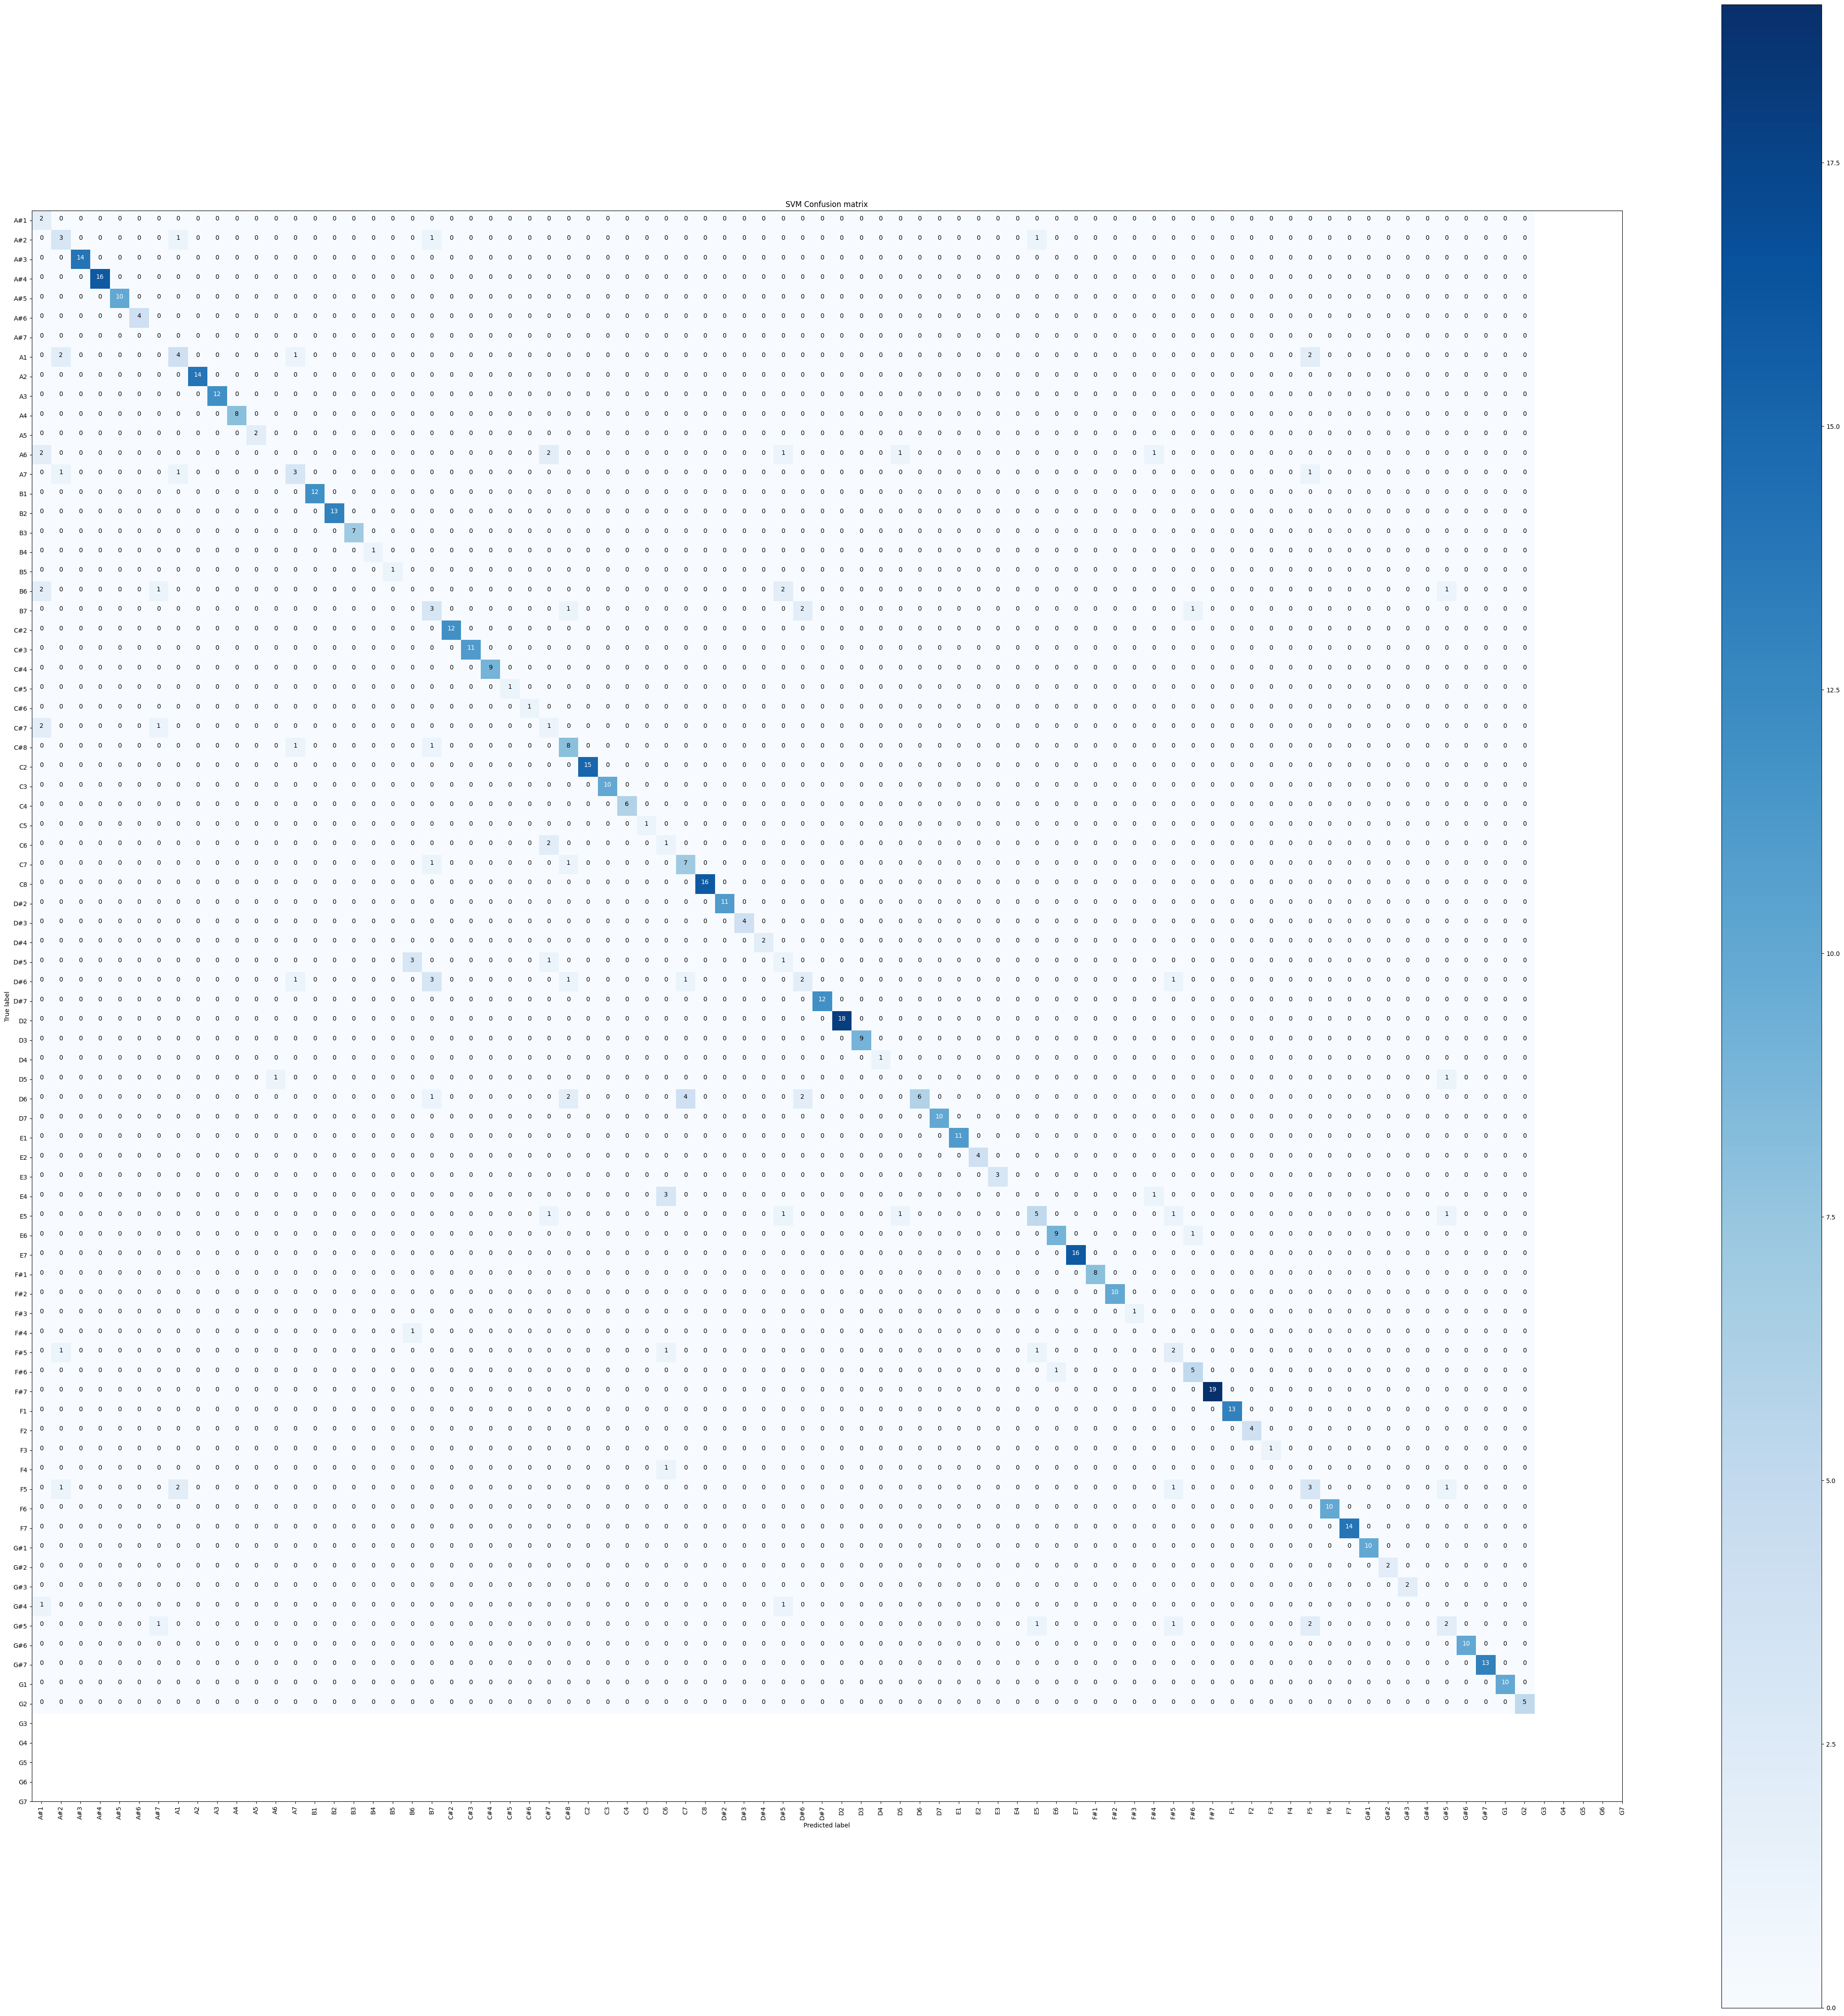

In [63]:
cm = confusion_matrix(y_test_pitch, y_pred_pitch)
plot_confusion_matrix(cm , pitch_classes, title="SVM Confusion matrix",figsize=(45,45))

In [64]:
print("Decision tree evaluating:")
y_pred_pitch = dt_model_pitch.predict(X_test)

accuracy = accuracy_score(y_test_pitch, y_pred_pitch)
recall = recall_score(y_test_pitch, y_pred_pitch, average='micro') #can try other ave method
precision = precision_score(y_test_pitch, y_pred_pitch, average='micro')

print('ACC = ',  round(accuracy,3))
print('precision = ', precision)
print('recall = ', recall)

Decision tree evaluating:
ACC =  0.736
precision =  0.7358490566037735
recall =  0.7358490566037735


Confusion matrix


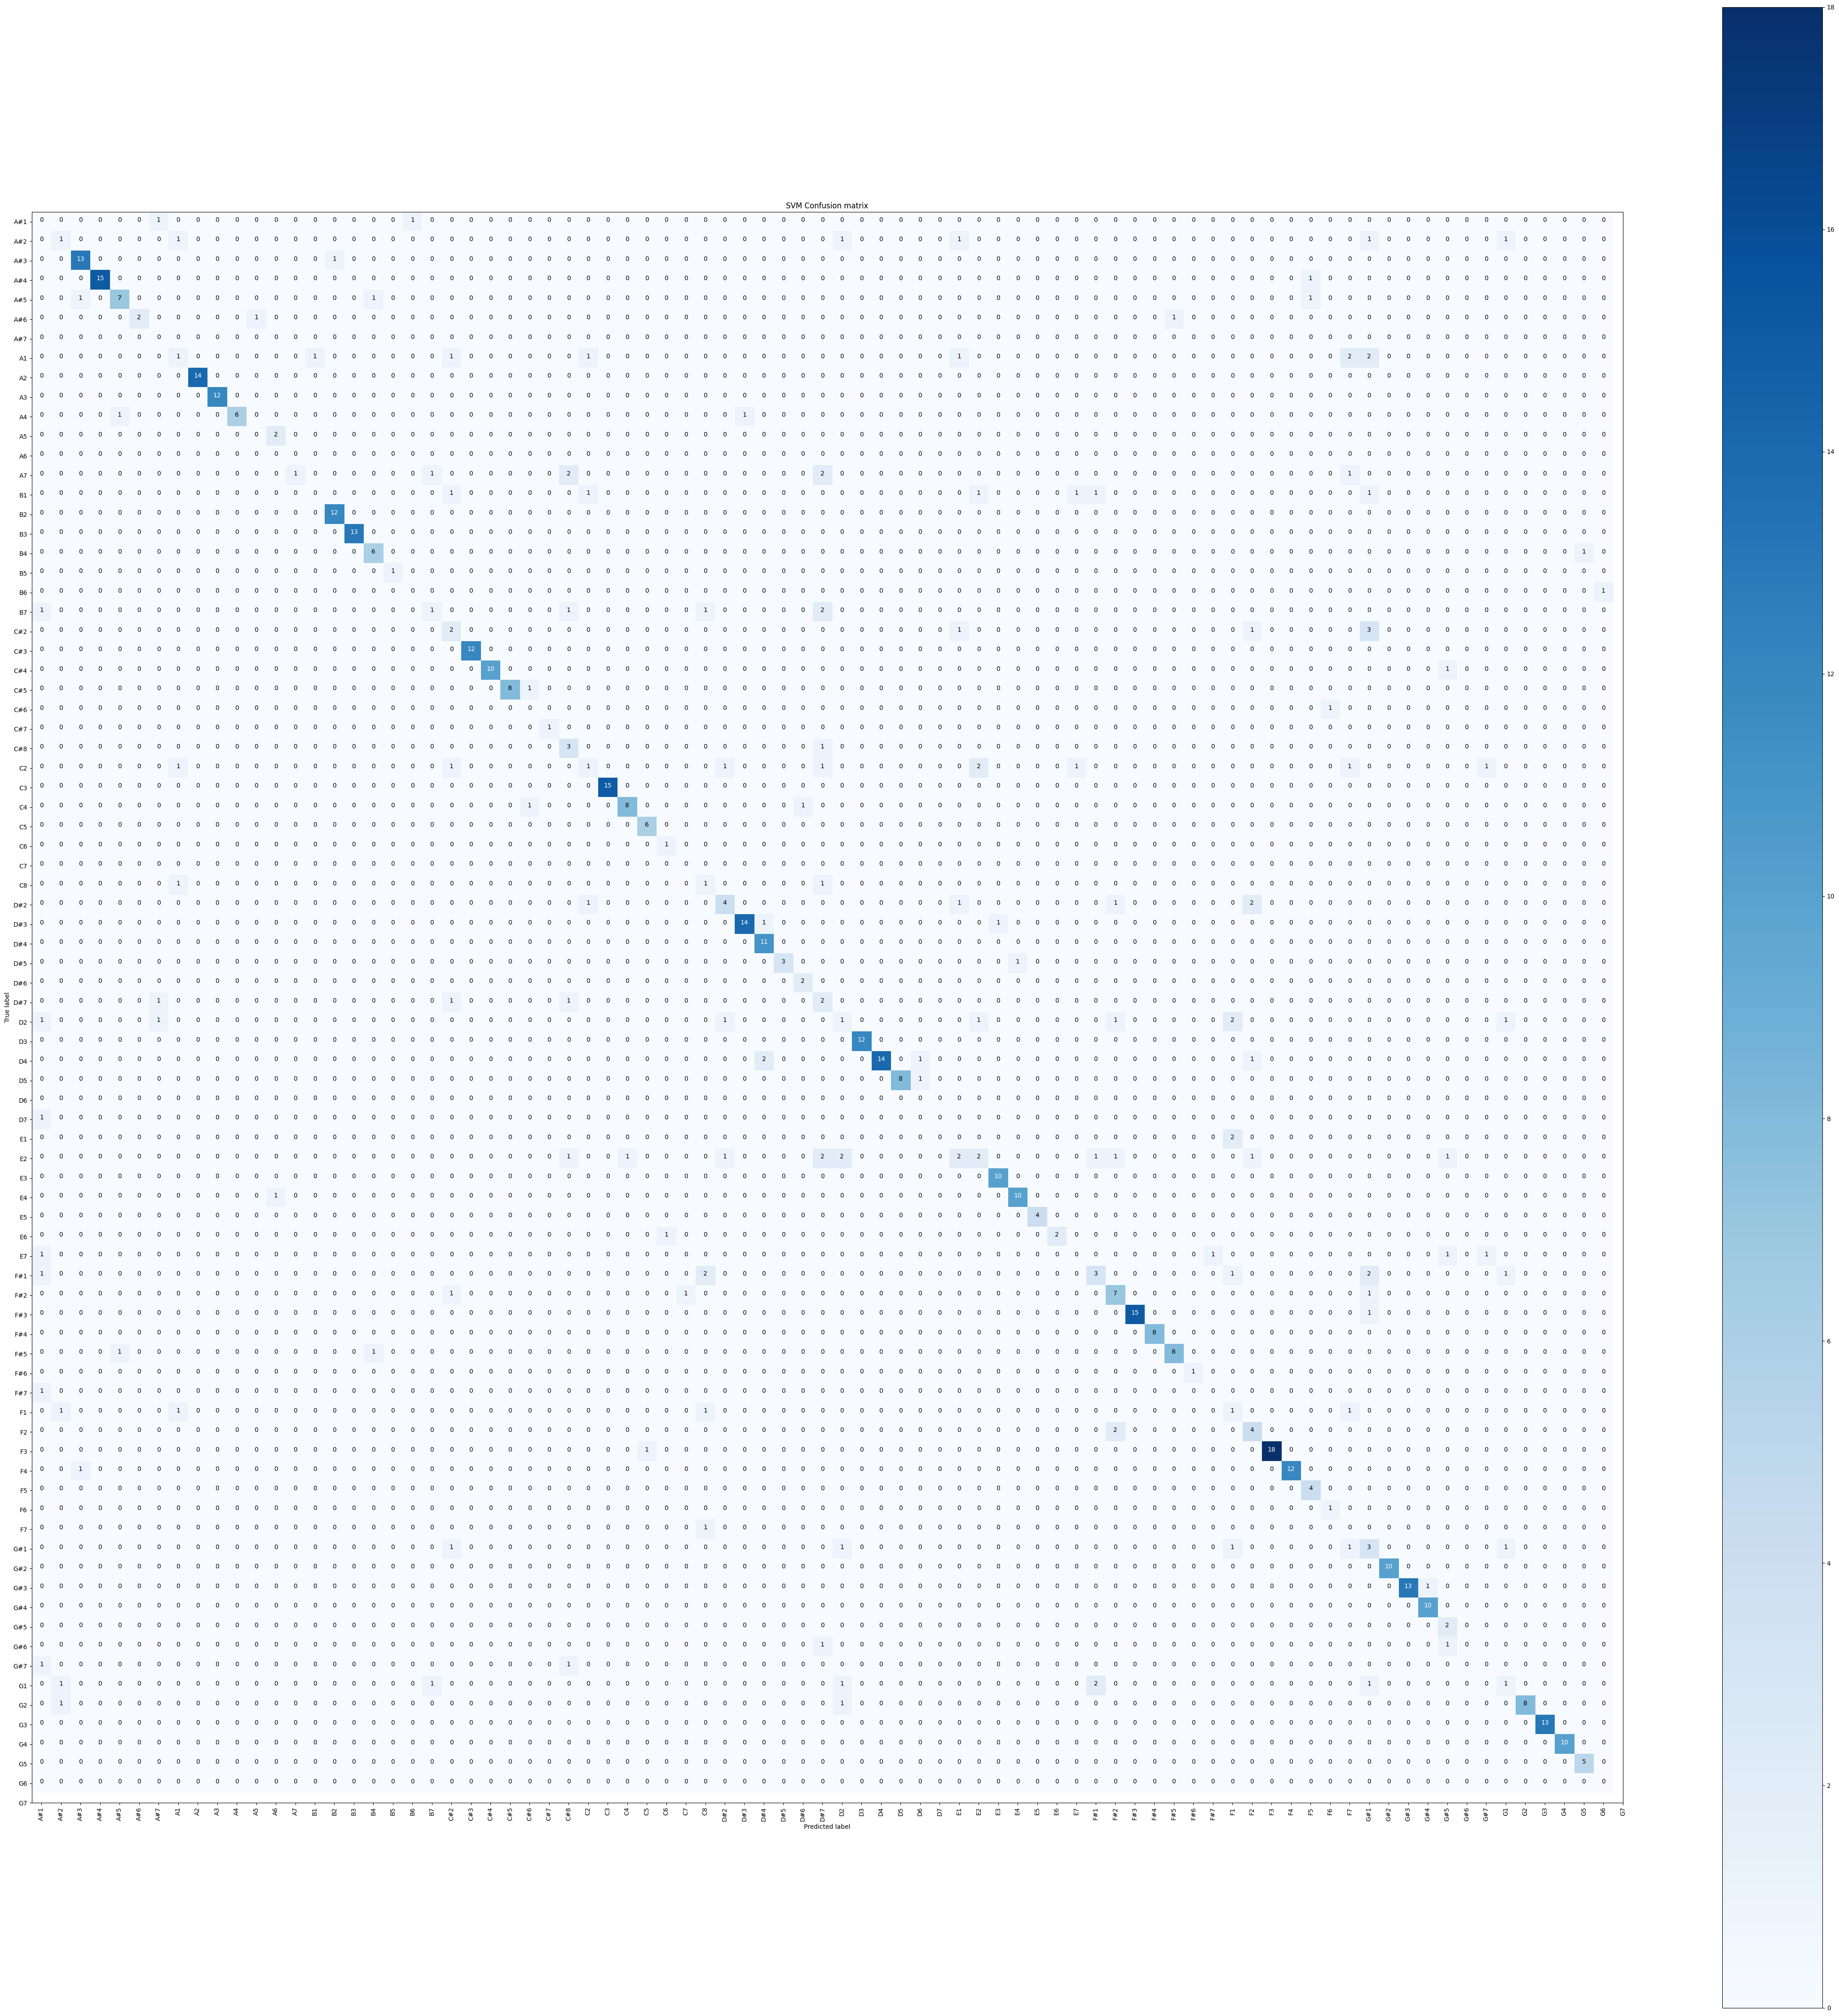

In [65]:
cm = confusion_matrix(y_test_pitch, y_pred_pitch)
plot_confusion_matrix(cm , pitch_classes, title="SVM Confusion matrix",figsize=(45,45))

In [66]:
print("MLP evaluating:")
y_pred_pitch = mlp_model_pitch.predict(X_test)

accuracy = accuracy_score(y_test_pitch, y_pred_pitch)
recall = recall_score(y_test_pitch, y_pred_pitch, average='micro') #can try other ave method
precision = precision_score(y_test_pitch, y_pred_pitch, average='micro')

print('ACC = ',  round(accuracy,3))
print('precision = ', precision)
print('recall = ', recall)

MLP evaluating:
ACC =  0.813
precision =  0.8130360205831904
recall =  0.8130360205831904


Confusion matrix


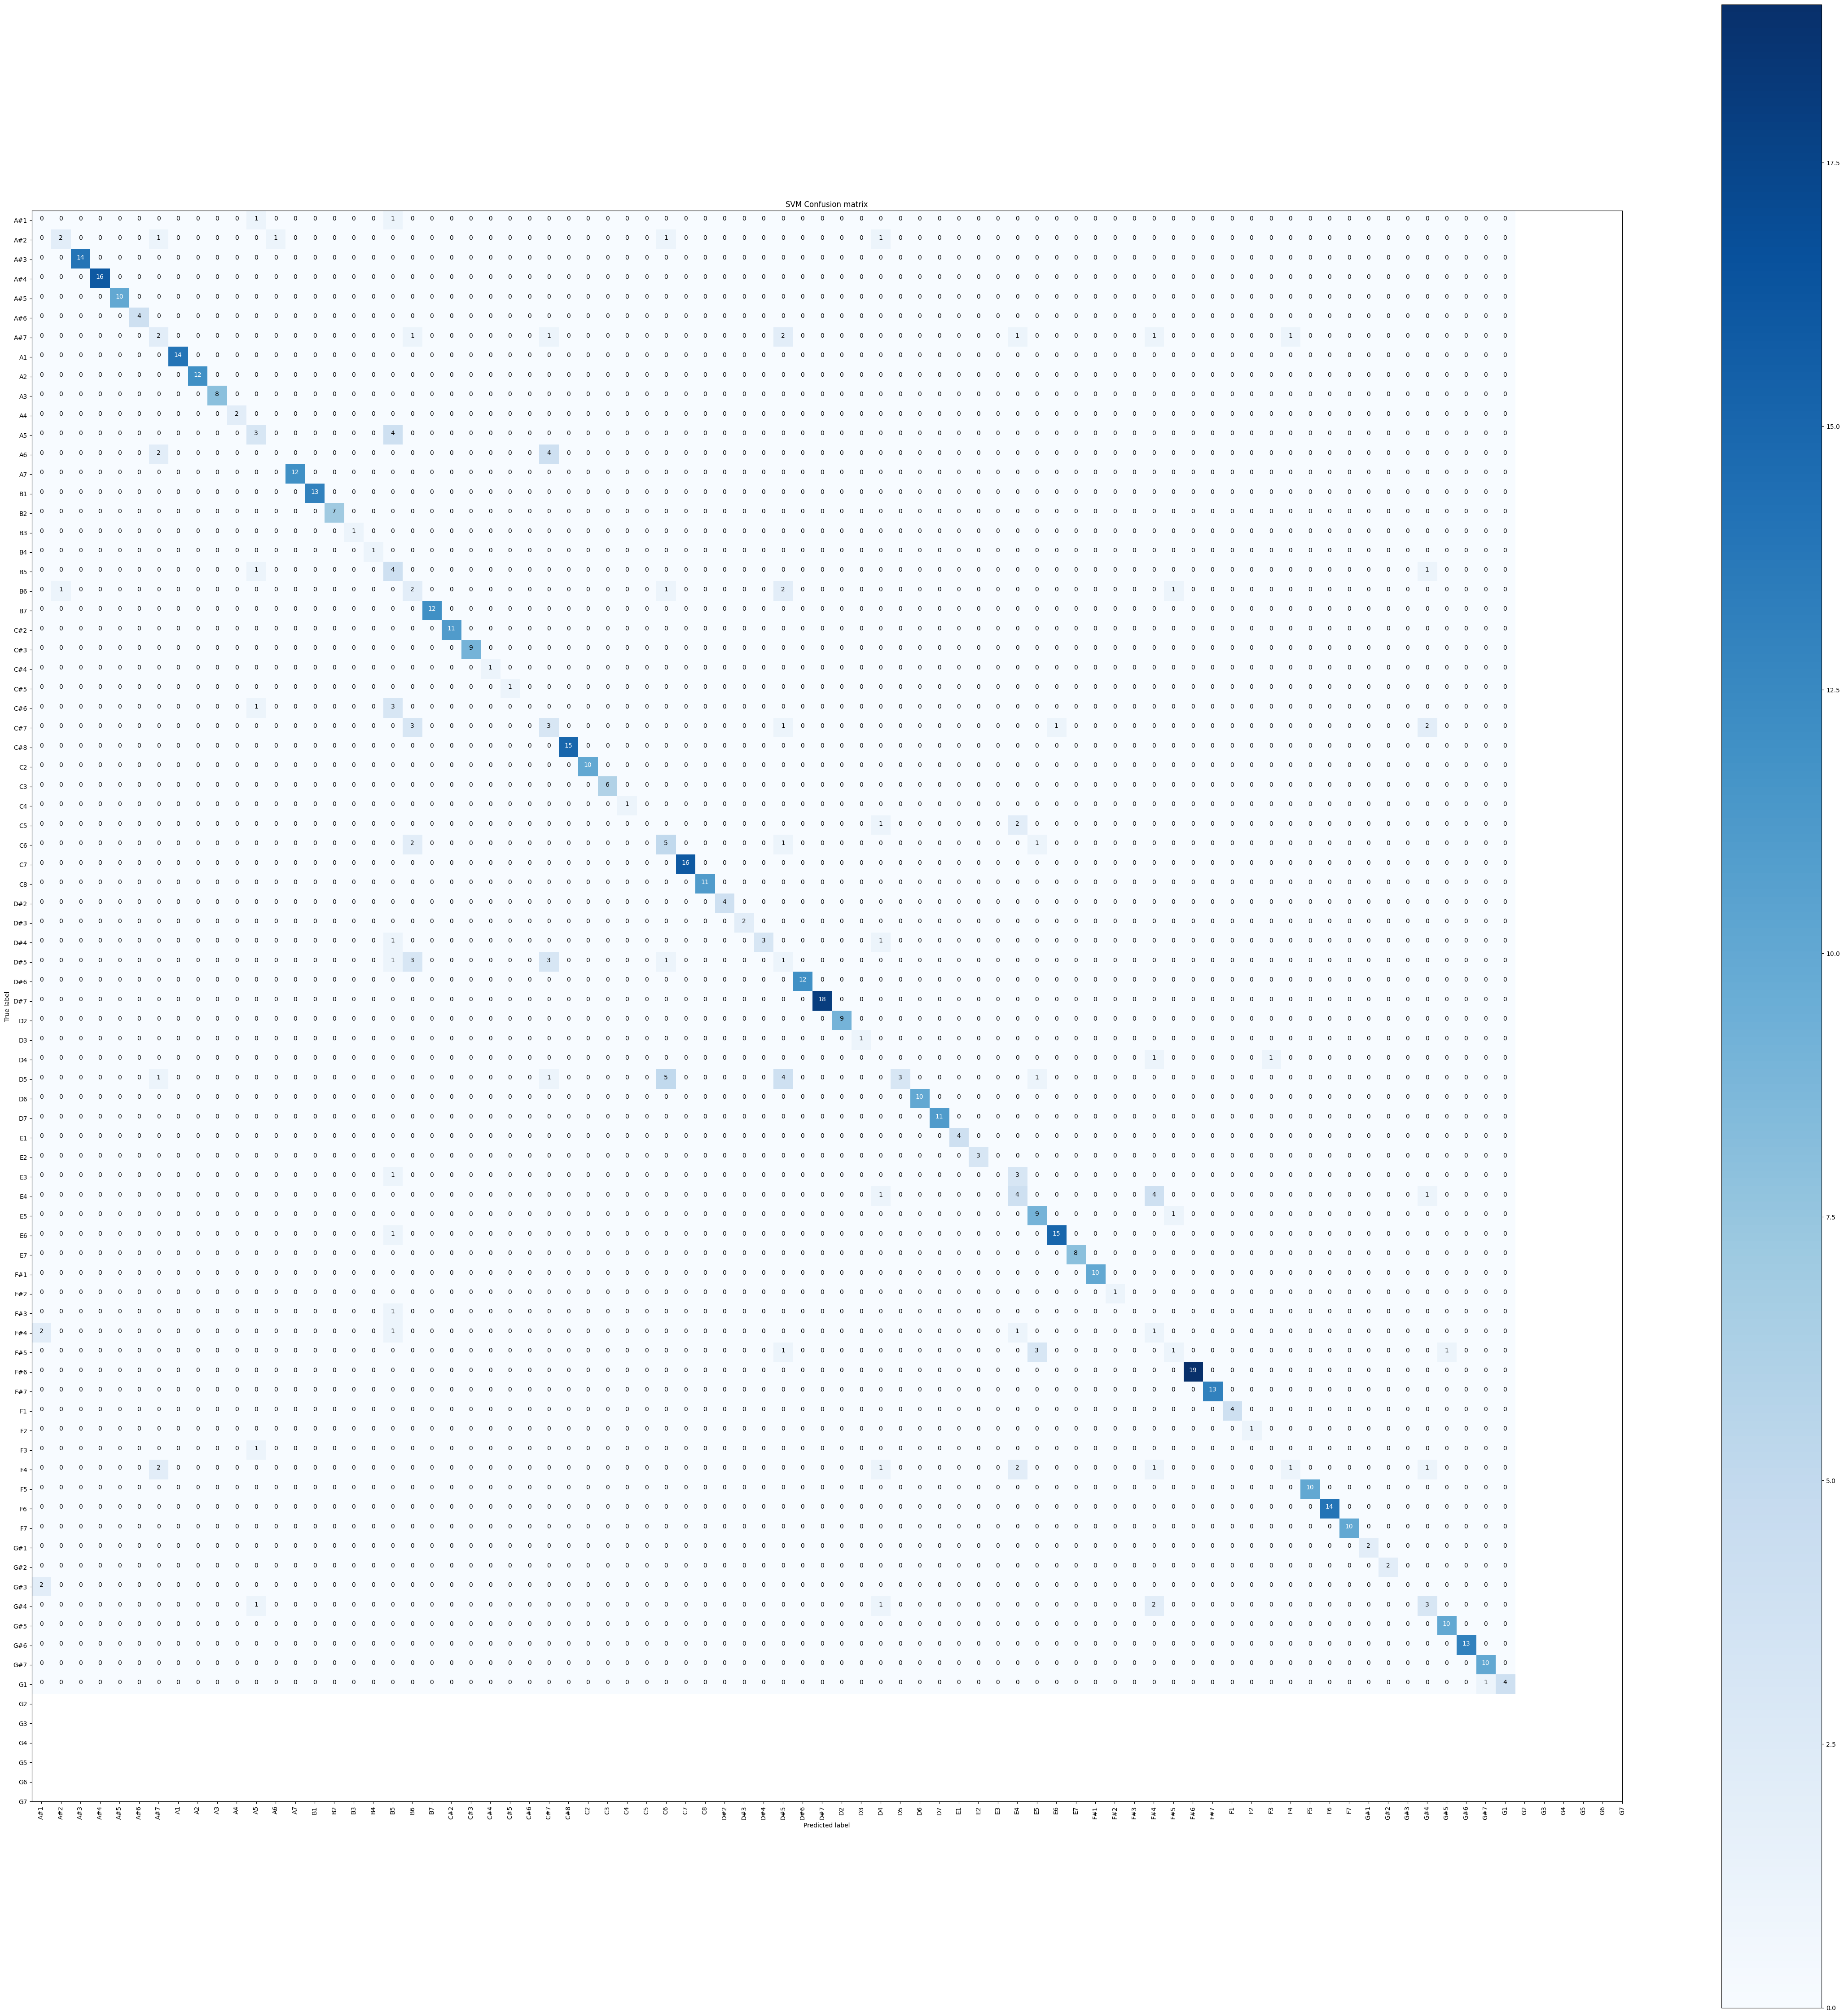

In [67]:
cm = confusion_matrix(y_test_pitch, y_pred_pitch)
plot_confusion_matrix(cm , pitch_classes, title="SVM Confusion matrix",figsize=(45,45))

5.

In [68]:
print("SVM parameter search")
from sklearn.model_selection import GridSearchCV
print("Instrument classificaiton")
param_grid = {'C': [0.01,0.03,0.05,0.07,0.09,0.1, 1, 10], 'gamma': [0.3,0.2,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,1,'scale']}

svm_model = SVC(kernel='linear', random_state=42)

grid_search = GridSearchCV(svm_model, param_grid, cv=3)
grid_search.fit(X_train, y_train_instrument)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_score = accuracy_score(y_test_instrument, y_pred)
print("Test Score:", test_score)

print("-----------------------------")
print("Pitch classification")
param_grid = {'C': [0.01,0.03,0.05,0.07,0.09,0.1, 1, 10], 'gamma': [0.3,0.2,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,1, 'scale']}

svm_model = SVC(kernel='linear', random_state=42)

grid_search = GridSearchCV(svm_model, param_grid, cv=2)
grid_search.fit(X_train, y_train_pitch)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_score = accuracy_score(y_test_pitch, y_pred)
print("Test Score:", test_score)

SVM parameter search
Instrument classificaiton
Best Parameters: {'C': 0.01, 'gamma': 0.3}
Best Score: 0.9326220550447356
Test Score: 0.967409948542024
-----------------------------
Pitch classification
Best Parameters: {'C': 0.01, 'gamma': 0.3}
Best Score: 0.8081545064377682
Test Score: 0.8644939965694682


In [69]:
print("Decision tree parameter search")
print("Instrument classificaiton")
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [None,5,6,7,8,9,10,11,12,13,14,15]}

dt_model = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(dt_model, param_grid, cv=3)
grid_search.fit(X_train, y_train_instrument)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_score = accuracy_score(y_test_instrument, y_pred)
print("Test Score:", test_score)

print("-----------------------------")
print("Pitch classification")
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [None,5,6,7,8,9,10,11,12,13,14,15]}

dt_model = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(dt_model, param_grid, cv=2)
grid_search.fit(X_train, y_train_pitch)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_score = accuracy_score(y_test_pitch, y_pred)
print("Test Score:", test_score)

Decision tree parameter search
Instrument classificaiton
Best Parameters: {'criterion': 'entropy', 'max_depth': 10}
Best Score: 0.8064329056597098
Test Score: 0.8096054888507719
-----------------------------
Pitch classification
Best Parameters: {'criterion': 'entropy', 'max_depth': 12}
Best Score: 0.6935622317596566
Test Score: 0.7478559176672385


In [70]:
print("Decision tree parameter search")
print("Instrument classificaiton")
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'alpha': [0.0001,0.001,0.01]
}

mlp_model = MLPClassifier(max_iter=1000, random_state=42)

grid_search = GridSearchCV(mlp_model, param_grid, cv=3)
grid_search.fit(X_train, y_train_instrument)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_score = accuracy_score(y_test_instrument, y_pred)
print("Test Score:", test_score)

print("-----------------------------")
print("Pitch classification")
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'alpha': [0.0001, 0.001, 0.01]
}

mlp_model = MLPClassifier(max_iter=1000, random_state=42)

grid_search = GridSearchCV(mlp_model, param_grid, cv=2)
grid_search.fit(X_train, y_train_pitch)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_score = accuracy_score(y_test_pitch, y_pred)
print("Test Score:", test_score)

Decision tree parameter search
Instrument classificaiton
Best Parameters: {'alpha': 0.0001, 'hidden_layer_sizes': (100,)}
Best Score: 0.9270417324541036
Test Score: 0.9571183533447685
-----------------------------
Pitch classification
Best Parameters: {'alpha': 0.0001, 'hidden_layer_sizes': (100,)}
Best Score: 0.7841201716738198
Test Score: 0.8181818181818182
